# DATA620 Project 3
Date: 2018-07-08

Team 6: Sang Yoon (Andy) Hwang, Santosh Manjrekar, Dhananjay Kumar, Matheesha Thambeliyagodage

In [ ]:
import nltk
import random
from nltk.corpus import names
#nltk.download('names')

In [62]:
names = nltk.corpus.names
names.fileids()

['female.txt', 'male.txt']

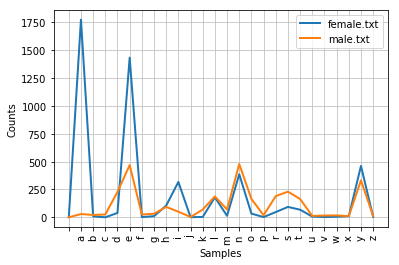

In [63]:
cf = nltk.ConditionalFreqDist(
    (fileid, name[-1])
    for fileid in names.fileids()
    for name in names.words(fileid))
cf.plot()

#Note that name[-1] is the last letter of first name.
#From Conditional Frequency Distribution, we know that names ending with a, e or i are usually female, names ending with h and l can be both male and female and names ending with k, o, r, s and t are more likely to be male.

In [64]:
#From the result above, we know that using the last letter of first name helps to classify genders. 
#we will start with this feature and compare with other features to improve accuracy if we need to.

names = ([(name, 'male') for name in names.words('male.txt')] +
         [(name, 'female') for name in names.words('female.txt')])

random.shuffle(names)

In [65]:
test_names = names[:500]
devtest_names = names[500:1000]
train_names = names[1000:]

In [66]:
names

[('Illa', 'female'),
 ('Devonne', 'female'),
 ('Rosalia', 'female'),
 ('Spiro', 'male'),
 ('Amos', 'male'),
 ('Andromache', 'female'),
 ('Joselyn', 'female'),
 ('Althea', 'female'),
 ('Gae', 'female'),
 ('Elly', 'female'),
 ('Tyne', 'female'),
 ('Pietra', 'female'),
 ('Pennie', 'female'),
 ('Ardelia', 'female'),
 ('Page', 'female'),
 ('Euphemia', 'female'),
 ('Jerrie', 'male'),
 ('Janaye', 'female'),
 ('Vida', 'female'),
 ('Imelda', 'female'),
 ('Donielle', 'female'),
 ('Yank', 'male'),
 ('Mmarianne', 'female'),
 ('Nedi', 'female'),
 ('Flemming', 'male'),
 ('Mandie', 'female'),
 ('Shayla', 'female'),
 ('Amberly', 'female'),
 ('Lothar', 'male'),
 ('Clemence', 'female'),
 ('Millicent', 'male'),
 ('Lanie', 'female'),
 ('Cornelle', 'female'),
 ('Margit', 'female'),
 ('Elvin', 'male'),
 ('Joann', 'female'),
 ('Charles', 'male'),
 ('Dea', 'female'),
 ('Ardelle', 'female'),
 ('Linnell', 'female'),
 ('Reese', 'male'),
 ('Blair', 'male'),
 ('Irene', 'female'),
 ('Bogdan', 'male'),
 ('Bertrand',

In [67]:
len(test_names), len(devtest_names), len(train_names), len(names)

(500, 500, 6944, 7944)

# Classifer using Naive Bayes

# feature 1. Last letter only

In [68]:
def feature_1(name):
    name=name.lower()
    return {
        'last_1_letter': name[-1]
        }
feature_1("Andy")

{'last_1_letter': 'y'}

In [69]:
train_set = [(feature_1(n), g) for (n,g) in train_names]
devtest_set = [(feature_1(n), g) for (n,g) in devtest_names]
test_set = [(feature_1(n), g) for (n,g) in test_names]
nb = nltk.NaiveBayesClassifier.train(train_set) 
nltk.classify.accuracy(nb, devtest_set)

#devset accuracy

0.766

In [70]:
nltk.classify.accuracy(nb, test_set)

#testset accuracy

0.768

# feature 2. Last 2 letters

In [71]:
def feature_2(name):
    name=name.lower()
    return {
        'last_2_letters': name[-2:]
        }
feature_2("Andy")

{'last_2_letters': 'dy'}

In [72]:
train_set = [(feature_2(n), g) for (n,g) in train_names]
devtest_set = [(feature_2(n), g) for (n,g) in devtest_names]
test_set = [(feature_2(n), g) for (n,g) in test_names]
nb2 = nltk.NaiveBayesClassifier.train(train_set) 
nltk.classify.accuracy(nb2, devtest_set)

#devset accuracy

0.792

In [73]:
nltk.classify.accuracy(nb2, test_set)

#testset accuracy

0.774

# feature 3. 2 letters as suffix

In [74]:
 def feature_3(word):
        return {
            'suffix1': word[-1:],
            'suffix2': word[-2:]
               }
feature_3("Andy")

{'suffix1': 'y', 'suffix2': 'dy'}

In [76]:
train_set = [(feature_3(n), g) for (n,g) in train_names]
devtest_set = [(feature_3(n), g) for (n,g) in devtest_names]
test_set = [(feature_3(n), g) for (n,g) in test_names]
nb3 = nltk.NaiveBayesClassifier.train(train_set) 
nltk.classify.accuracy(nb3, devtest_set)

#devset accuracy

0.812

In [77]:
nltk.classify.accuracy(nb3, test_set)

#testset accuracy

0.764

# Checking the error for features

# feature_1 error checking

In [50]:
errors = []
for (name, tag) in devtest_names:
    guess = nb.classify(feature_1(name))
    if guess != tag:
        errors.append((tag, guess, name))

In [51]:
for (tag, guess, name) in sorted(errors):
    print 'correct=%-8s guess=%-8s name=%-30s' % (tag, guess, name)

SyntaxError: invalid syntax (<ipython-input-51-fde010024e1b>, line 2)

In [52]:
nb.show_most_informative_features()

Most Informative Features
           last_1_letter = 'a'            female : male   =     34.6 : 1.0
           last_1_letter = 'k'              male : female =     30.6 : 1.0
           last_1_letter = 'f'              male : female =     23.0 : 1.0
           last_1_letter = 'p'              male : female =     19.7 : 1.0
           last_1_letter = 'v'              male : female =     16.3 : 1.0
           last_1_letter = 'd'              male : female =      9.9 : 1.0
           last_1_letter = 'm'              male : female =      9.3 : 1.0
           last_1_letter = 'o'              male : female =      8.6 : 1.0
           last_1_letter = 'r'              male : female =      6.5 : 1.0
           last_1_letter = 'g'              male : female =      5.2 : 1.0


In [ ]:
#From likelihood ratio, we know that name ending with 'a' is female 34.6 times more often than it is male and ending with 'k' is male 30.6 times more often than it is feamle.

# feature_2 error checking

In [53]:
errors = []
for (name, tag) in devtest_names:
    guess = nb2.classify(feature_2(name))
    if guess != tag:
        errors.append((tag, guess, name))

In [54]:
for (tag, guess, name) in sorted(errors):
    print 'correct=%-8s guess=%-8s name=%-30s' % (tag, guess, name)

SyntaxError: invalid syntax (<ipython-input-54-fde010024e1b>, line 2)

In [55]:
nb2.show_most_informative_features()

Most Informative Features
          last_2_letters = 'na'           female : male   =     91.7 : 1.0
          last_2_letters = 'la'           female : male   =     71.9 : 1.0
          last_2_letters = 'ia'           female : male   =     51.8 : 1.0
          last_2_letters = 'sa'           female : male   =     32.4 : 1.0
          last_2_letters = 'us'             male : female =     27.2 : 1.0
          last_2_letters = 'do'             male : female =     24.8 : 1.0
          last_2_letters = 'ta'           female : male   =     24.4 : 1.0
          last_2_letters = 'ra'           female : male   =     24.2 : 1.0
          last_2_letters = 'rd'             male : female =     21.9 : 1.0
          last_2_letters = 'rt'             male : female =     21.5 : 1.0


In [ ]:
#From likelihood ratio, we know that name ending with 'na' is female 91.7 times more often than it is male and name ending with 'us' is male 27.2 times more often than it is feamle.

# feature_3 error checking

In [78]:
errors = []
for (name, tag) in devtest_names:
    guess = nb3.classify(feature_3(name))
    if guess != tag:
        errors.append((tag, guess, name))

In [79]:
for (tag, guess, name) in sorted(errors):
    print 'correct=%-8s guess=%-8s name=%-30s' % (tag, guess, name)

SyntaxError: invalid syntax (<ipython-input-79-fde010024e1b>, line 2)

In [80]:
nb3.show_most_informative_features()

Most Informative Features
                 suffix2 = 'na'           female : male   =     95.0 : 1.0
                 suffix2 = 'la'           female : male   =     70.2 : 1.0
                 suffix2 = 'ia'           female : male   =     53.2 : 1.0
                 suffix1 = 'a'            female : male   =     36.3 : 1.0
                 suffix2 = 'ld'             male : female =     35.9 : 1.0
                 suffix2 = 'sa'           female : male   =     35.2 : 1.0
                 suffix2 = 'rt'             male : female =     30.8 : 1.0
                 suffix1 = 'k'              male : female =     28.7 : 1.0
                 suffix2 = 'us'             male : female =     26.3 : 1.0
                 suffix2 = 'ra'           female : male   =     24.2 : 1.0


In [ ]:
#From likelyhood ratio, we know that name ending with 'na' is female 95.0 times more often than it is male and name ending with 'ld' is male 35.9 times more often than it is feamle.